In [92]:
import pandas as pd
# Mengimpor dataset
dataset = pd.read_csv('./Dataset/Pumpkin_Seeds_Dataset.csv')
dataset.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,cercevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,cercevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,cercevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,cercevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,cercevelik


In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = dataset.drop("Class", axis=1)
y = dataset["Class"]


# Membagi data ke test dan training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Mengkodekan label menggunakan LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Inisialisasi ANN
MesinKlasifikasi = Sequential()

# Menambah input layer dan hidden layer pertama
MesinKlasifikasi.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Menambah hidden layer kedua
MesinKlasifikasi.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Menambah output layer
# Jumlah unit di output layer harus sesuai dengan jumlah kelas yang diinginkan
# Jika Anda memiliki 5 kelas, maka jumlah unit di output layer harus 5
MesinKlasifikasi.add(Dense(units=5, kernel_initializer='uniform', activation='softmax'))

# Meenjalankan ANN
MesinKlasifikasi.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fitting ANN ke training set
MesinKlasifikasi.fit(X_train, y_train, batch_size=10, epochs=100)

# Memprediksi hasil test set
y_pred = MesinKlasifikasi.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) # Mengubah nilai probabilitas menjadi kelas


Epoch 1/100


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4778 - loss: 1.4703
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5171 - loss: 0.7327
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8438 - loss: 0.4995
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8633 - loss: 0.3536
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8769 - loss: 0.3174
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8846 - loss: 0.2913
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8769 - loss: 0.2860
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8883 - loss: 0.2882
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8875 - loss: 0.2809
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8872 - loss: 0.2791
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8896 - loss: 0.2736
Epoch 12/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [96]:
# Menghitung akurasi
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.868


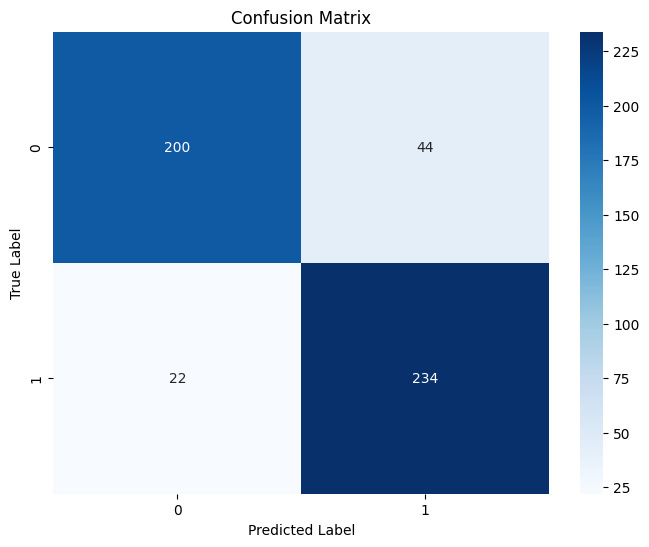

In [97]:
# Membuat visualisasi confusion matrix
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()